# Import Package

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [39]:
df = pd.read_csv("dataset.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


# Praprocessing

### Jumlah Baris dan Kolom

In [40]:
df.shape

(8535, 6)

### Melihat Missing Value

In [41]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [42]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

### Melihat Kembali Jumlah Baris dan Kolom

In [43]:
df.shape

(8400, 6)

### Mengubah value dari kolom Cuaca

In [44]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

### Menggunakan Regex untuk mengelompokkan jenis Cuaca

In [45]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'
  else:
    return 'Tidak Teridentifikasi'

df["cuaca"] = df['cuaca'].apply(cuaca)
df["cuaca"].value_counts()

Cerah                    3796
Berawan                  2896
Hujan                    1706
Tidak Teridentifikasi       2
Name: cuaca, dtype: int64

In [46]:
df.waktu.value_counts()

Siang        1758
Pagi         1758
Malam        1758
Dini Hari    1758
siang         342
pagi          342
malam         342
dini hari     342
Name: waktu, dtype: int64

In [47]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2100
Dini Hari    2100
Name: waktu, dtype: int64

### Drop Data

In [48]:
df[df["cuaca"] == "Tidak Teridentifikasi"].index

Int64Index([358, 7011], dtype='int64')

In [49]:
df.drop(df[df["cuaca"] == "Tidak Teridentifikasi"].index, inplace=True)
df["cuaca"].unique()

array(['Hujan', 'Berawan', 'Cerah'], dtype=object)

Split Data Kelembaban menjadi Kelembapan Minimal dan Maximal

In [50]:
df["kelembapan_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembapan_min"] = [x.strip(' ') for x in df["kelembapan_min"]]

df["kelembapan_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembapan_max"] = [x.strip(' ') for x in df["kelembapan_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


In [51]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


Melihat Masing Masing Data dari Suhu

In [52]:
print('Suhu Min\n', df['suhu_min'].value_counts(), '\n')
print('Suhu Max\n', df['suhu_max'].value_counts(), '\n')

Suhu Min
 24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64 

Suhu Max
 33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64 



Melihat Masing Masing Data dari Kelembapan

In [53]:
print('Kelembapan Min\n', df['kelembapan_min'].value_counts(), '\n\n')
print('Kelembapan Min\n', df['kelembapan_max'].value_counts(), '\n')

Kelembapan Min
 70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembapan_min, dtype: int64 


Kelembapan Min
 95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembapan_max, dtype: int64 



# Tahap Praprocessing 2

In [54]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


### Drop Kolom

In [55]:
df.drop(columns=["kelembaban_persen", "suhu_derajat_celcius", "tanggal"], inplace=True)

In [56]:
df.wilayah.value_counts()

Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Kepulauan Seribu    1399
Jakarta Barat       1399
Name: wilayah, dtype: int64

### Mengubah Tipe Data

In [57]:
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min    object
kelembapan_max    object
suhu_min          object
suhu_max          object
dtype: object

In [58]:
df["kelembapan_min"] = df.kelembapan_min.astype(int)
df["kelembapan_max"] = df.kelembapan_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min     int32
kelembapan_max     int32
suhu_min           int32
suhu_max           int32
dtype: object

# Visualisasi Data

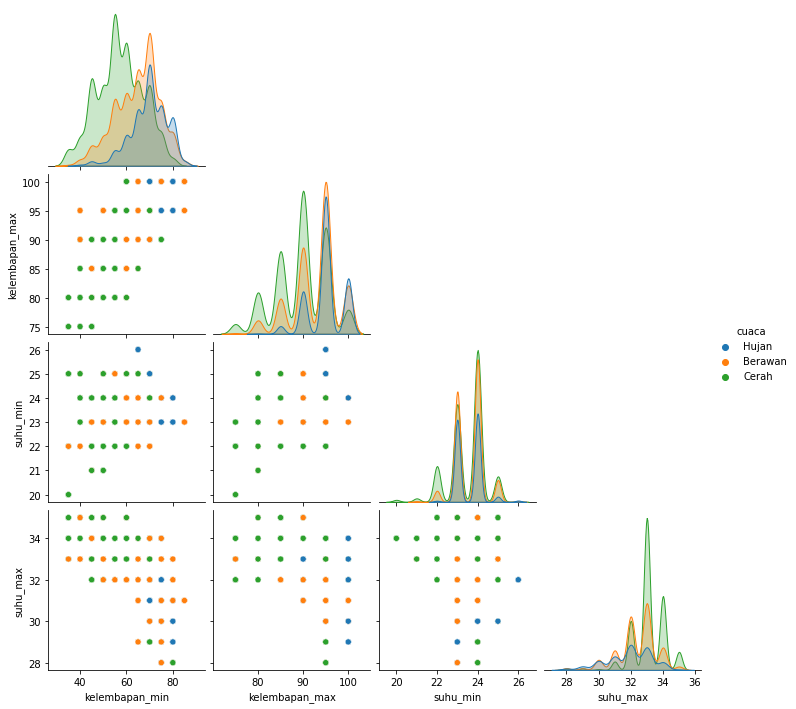

In [59]:
sns.pairplot(df, hue="cuaca", corner=True)

# Target Encoding

In [60]:
replacement_mapping_dict = {
    "Cerah": 0,
    "Berawan": 1,
    "Hujan": 2,
}
df["cuaca"].replace(replacement_mapping_dict, inplace=True)

In [61]:
df["kelebapan_rata-rata"] = (df["kelembapan_min"] + df["kelembapan_max"]) / 2
df["suhu_rata-rata"] = (df["suhu_min"] + df["suhu_max"]) / 2

In [62]:
df.head()

,wilayah,waktu,cuaca,kelembapan_min,kelembapan_max,suhu_min,suhu_max,kelebapan_rata-rata,suhu_rata-rata
0,Kepulauan Seribu,Siang,2,70,90,24,32,80.0,28.0
1,Kepulauan Seribu,Pagi,2,70,90,24,32,80.0,28.0
2,Kepulauan Seribu,Malam,2,70,90,24,32,80.0,28.0
3,Kepulauan Seribu,Dini Hari,2,70,90,24,32,80.0,28.0
4,Jakarta Utara,Siang,2,70,90,24,32,80.0,28.0


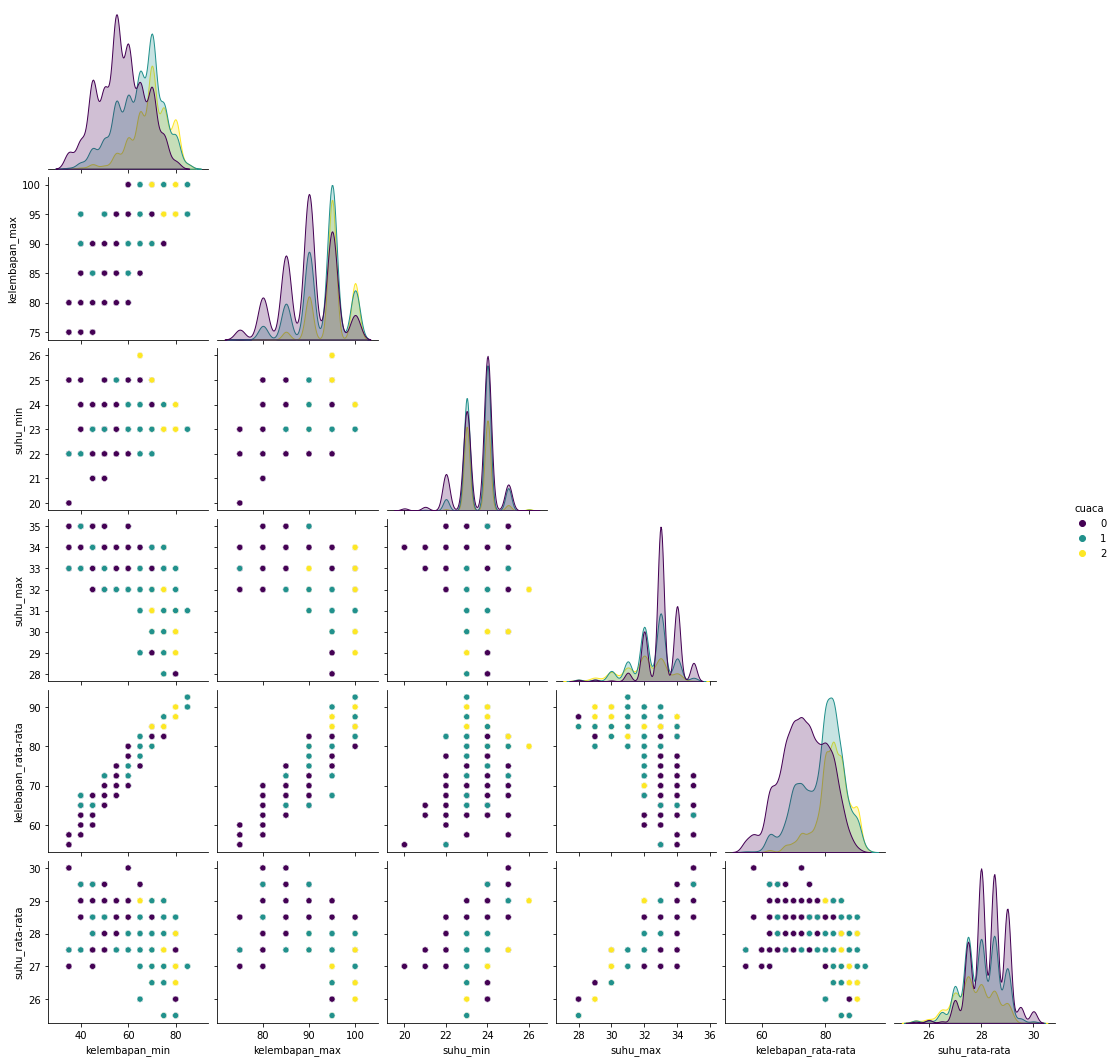

In [76]:
sns.pairplot(df, hue="cuaca", corner=True, palette="viridis")

# Splitting Data

In [64]:
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6718, 8), (1680, 8), (6718,), (1680,))

# Tahap Preprocessing 3

In [65]:
X_train.head()

,wilayah,waktu,kelembapan_min,kelembapan_max,suhu_min,suhu_max,kelebapan_rata-rata,suhu_rata-rata
1768,Jakarta Pusat,Siang,60,90,24,34,75.0,29.0
6034,Jakarta Timur,Malam,75,95,24,34,85.0,29.0
2491,Jakarta Pusat,Dini Hari,40,85,24,34,62.5,29.0
6349,Jakarta Selatan,Pagi,70,95,23,33,82.5,28.0
3486,Jakarta Utara,Malam,45,75,22,32,60.0,27.0


### Dummies Encoding

In [66]:
X_train = pd.get_dummies(X_train, columns=["waktu", "wilayah"])
X_test = pd.get_dummies(X_test, columns=["waktu", "wilayah"])

In [67]:
X_train.head()

,kelembapan_min,kelembapan_max,suhu_min,suhu_max,kelebapan_rata-rata,suhu_rata-rata,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu
1768,60,90,24,34,75.0,29.0,0,0,0,1,0,1,0,0,0,0
6034,75,95,24,34,85.0,29.0,0,1,0,0,0,0,0,1,0,0
2491,40,85,24,34,62.5,29.0,1,0,0,0,0,1,0,0,0,0
6349,70,95,23,33,82.5,28.0,0,0,1,0,0,0,1,0,0,0
3486,45,75,22,32,60.0,27.0,0,1,0,0,0,0,0,0,1,0


In [68]:
X_test.head()

,kelembapan_min,kelembapan_max,suhu_min,suhu_max,kelebapan_rata-rata,suhu_rata-rata,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu
7548,70,90,24,31,80.0,27.5,0,0,0,1,0,0,1,0,0,0
2230,45,90,24,34,67.5,29.0,0,1,0,0,1,0,0,0,0,0
3589,55,85,23,33,70.0,28.0,0,0,1,0,0,0,1,0,0,0
2520,50,90,23,34,70.0,28.5,0,0,0,1,0,0,0,0,0,1
5419,55,90,24,33,72.5,28.5,1,0,0,0,0,1,0,0,0,0


# Fitting Data

### Random Forest

In [69]:
from jcopml.tuning import grid_search_params as gsp
gsp.rf_params

paramater = {
    'n_estimators': [100, 150, 200],
    'max_depth': [20, 50, 80],
    'max_features': [0.3, 0.6, 0.8],
    'min_samples_leaf': [1, 5, 10]
}

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier(n_jobs=-1, random_state=42)

model = GridSearchCV(RF, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 50, 'max_features': 0.6, 'min_samples_leaf': 5, 'n_estimators': 200}


In [71]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

[[595 122  43]
 [160 343  76]
 [ 43  92 206]] 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3036
           1       0.71      0.69      0.70      2317
           2       0.75      0.71      0.73      1365

    accuracy                           0.76      6718
   macro avg       0.75      0.74      0.75      6718
weighted avg       0.76      0.76      0.76      6718
 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       760
           1       0.62      0.59      0.60       579
           2       0.63      0.60      0.62       341

    accuracy                           0.68      1680
   macro avg       0.67      0.66      0.66      1680
weighted avg       0.68      0.68      0.68      1680



Akurasi Training 75% <br>
Akurasi Testing 67% <br>

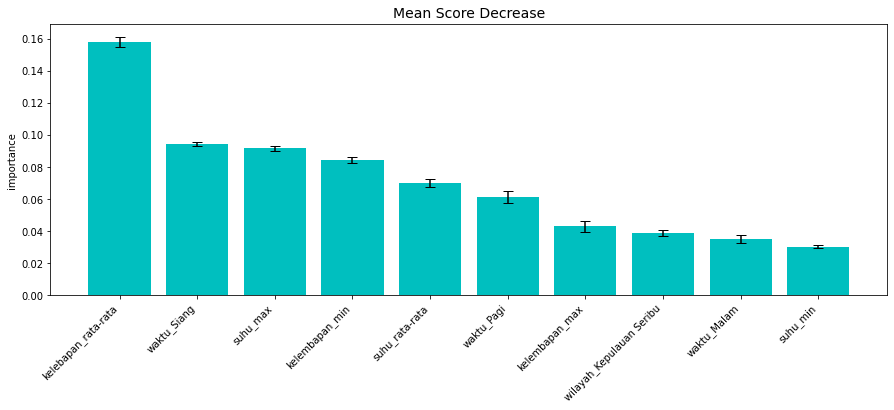

In [72]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)